In [14]:
import numpy as np
from matplotlib import pyplot as plt, collections as clt
import itertools as it
%matplotlib inline
import pickle
import scipy as sp

np.random.seed(7)

def gen_rand_vecs(n):
    dims = n
    number = n
    vecs = np.random.normal(size=(number, dims))
    mags = np.linalg.norm(vecs, axis=-1)

    return vecs/mags[...,np.newaxis]

def plot_lines(ends):
    # ends = gen_rand_vecs(2)
    vectors = np.insert(ends[:, np.newaxis], 0, 0, axis=1)
    fig, ax = plt.subplots()
    ax.add_collection(clt.LineCollection(vectors))
    ax.axis((-1,1,-1,1))
    plt.show()

def gen_eps(n):
    eps_vals = [-1, 1]
    combs = [ x for x in it.combinations_with_replacement(eps_vals, n) ]
    return get_half_set(set([ x for t in combs for x in it.permutations(t) ]))

def koml_norm(U, eps_vecs):
    w = []
    for eps in eps_vecs:
        v = np.transpose(U).dot(eps)
        w += np.max(abs(v)),
    return np.min(w)

def compute_koml(n, loop_ct):
    k = []
    H = []
    eps_vecs = gen_eps(n)
    for i in range(loop_ct):
        U = gen_rand_vecs(n)
        nm = koml_norm(U, eps_vecs)
        k.append(nm)
        if nm > 1.5:
            H.append((nm, U))
    return k, H

def save_fig(k, n): 
    fig,ax = plt.subplots()
    ax.scatter(range(len(k)), k, alpha=.3)
    plt.gcf().text(1.,0.8, 'n: ' + str(n), color='r', weight='bold' )
    plt.gcf().text(1.,0.7, 'empirical max: ' + str(np.max(k)), color='r', weight='bold' )
    plt.gcf().text(1.0,0.6, '1 + 1./sqrt(n): ' + str(1 + 1./np.sqrt(n)), color='r' , weight='bold')
    plt.gcf().text(1.0,0.5, 'sqrt(n): ' + str(np.sqrt(n)), color='r' , weight='bold')
    plt.gcf().text(1.0,0.4, 'empirical mean: ' + str(np.mean(k)), color='g' , weight='bold')
    plt.gcf().text(1.0,0.3, 'empirical var: ' + str(np.var(k)), color='g' , weight='bold')
    plt.savefig('./koml_' + str(n) + '.png', bbox_inches='tight')
    plt.close(fig)

def save_hivecs(H, n):
    fname = './arr_' + str(n) + '.txt'
    pickle.dump(H, open(fname, 'w'))

def get_half_set(s):
    '''
    If s = {(1, 1), (1, -1), (-1, 1), (-1, -1)}
    then return is one of the following:
    {(1, 1), (-1, 1)}
    {(-1, -1), (1, -1)}
    {(1, 1), (1, -1)}
    {(-1, -1), (-1, 1)}
    
    symmetric reflections are not returned in a single set, 
    so (1, 1) and (-1, -1) cannot co-occur in the return
    '''
    p = set([])
    for i in s:
        if i in p:
            continue
        if neg(i) in p:
            continue
        p.add(i)
    return p

def neg(i):
    '''
    Negates the items of a tuple
    if i = (-1, 1), return (1, -1)
    '''
    return tuple([-x for x in i])

In [10]:
import timeit
start_time = timeit.default_timer()
#Loop, compute, savefig
loop_ct = 1000
srange = range(3, 4)
for i in srange:
    k, H = compute_koml(i, loop_ct)
    save_fig(k, i)
    save_hivecs(H, i)
elapsed = timeit.default_timer() - start_time
print elapsed, loop_ct, srange

0.280039072037 1000 [3]


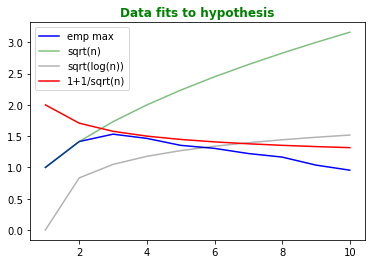

In [38]:
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_values=[1., 1.41407, 1.5316, 1.4638, 1.3527, 1.3044, 1.222, 1.1649, 1.0367, .956]
one_plus_one_over = [2., 1.7071, 1.5773, 1.5, 1.44721, 1.4082, 1.3779, 1.353, 1.333, 1.316]
sqrt_values=[1., 1.41421, 1.732, 2., 2.236, 2.4494, 2.645, 2.828, 3., 3.1622]
mean_values=[1., 0.67056, 0.73057, 0.7284, 0.7253, 0.7232, 0.71872, 0.71633, 0.717204, 0.7078]
var_values=[0., 0.1436, 0.0533, 0.03937, 0.02953, 0.02299, 0.01827, 0.01487, 0.01286, 0.0100]

plt.plot(n_values, max_values, color='b', label='emp max')
#plt.plot(n_values, mean_values, color='b', label='emp mean')
plt.plot(n_values, sqrt_values, color='g', label='sqrt(n)', alpha=.5)
plt.plot(n_values, np.sqrt(np.log(n_values)), color='k', label='sqrt(log(n))', alpha=.3)
#plt.plot(n_values, var_values, color='y',  label='emp variance')
plt.plot(n_values, one_plus_one_over, color='red',  label='1+1/sqrt(n)')
plt.legend(loc=2)
plt.title('Data fits to hypothesis', weight='bold', color='g')

In [ ]:
sqr2 = 1./np.sqrt(2)
A = np.array([(sqr2, -sqr2),(sqr2, sqr2)])
u, d, v = np.linalg.svd(A)
print(A)
print(u, d, v)

In [ ]:
y = np.logspace(2, 8)
logy = np.log(y)
one_over_y = [1./x for x in y]
plt.scatter(y, logy, color='b', alpha=.3)
plt.scatter(y, one_over_y, color='g', alpha=.3)

In [ ]:
np.random.seed(7)
B = gen_rand_vecs(2)
u, d, v = np.linalg.svd(B)
print(B)
print(u, d, v)

In [ ]:
np.random.seed(7)
B = gen_rand_vecs(3)
u, d, v = np.linalg.svd(B)
print(B, 1./np.sqrt(3))
print(u, d, v)

In [ ]:
H = []
for _ in range(2):
    H += gen_rand_vecs(3),
print(H)
save_hivecs(H, 3)

### Load Pickle File and Infer the polar coords in 3D

In [197]:
def get_spherical(xyz):
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

def two_norm(a):
    return np.sqrt(np.dot(a.T, a))

def angular_sep(a, b):
    ''' 
    In radians
    '''
    return np.arccos(np.dot(a.T, b)/two_norm(a))

import mpl_toolkits.mplot3d.axes3d as axes3d
def plot_cartesian(abc):
    a, b, c = abc[0], abc[1], abc[2]
    X = [0, a[0], 0, b[0], 0, c[0]] 
    Y = [0, a[1], 0, b[1], 0, c[1]]
    Z = [0, a[2], 0, b[2], 0, c[2]]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #ax.plot_wireframe(X, Y, Z, color='r')
    for t in range(3):
        s = 2*t 
        e = s + 2
        c = {0:'r', 1:'g', 2:'b'} #rgb
        ax.plot_wireframe(X[s:e], Y[s:e], Z[s:e], color=c[t])
    ax.set_xlabel('\n x')
    ax.set_ylabel('\n y')
    ax.set_zlabel('\n z')
    ax.set_xlim3d(-0.7,0.7)
    ax.set_ylim3d(-0.7,0.7)
    ax.set_zlim3d(-0.7,0.7)
    ax.view_init(elev=20., azim=60.)

def spherical2cartesian(alphas):
    z1, x1, y1 = np.cos(alphas[0]), np.sin(alphas[0])*np.cos(alphas[1]), np.sin(alphas[0])*np.sin(alphas[1])
    z2, x2, y2 = np.cos(alphas[2]), np.sin(alphas[2])*np.cos(alphas[3]), np.sin(alphas[2])*np.sin(alphas[3])
    z3, x3, y3 = np.cos(alphas[4]), np.sin(alphas[4])*np.cos(alphas[5]), np.sin(alphas[4])*np.sin(alphas[5])
    return [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]

def plot_spherical(alphas):
    plot_cartesian(spherical2cartesian(alphas))
    

1.55192013618 -0.958878925927
('arr: ', array([[-0.44858118, -0.82424979,  0.34552455],
       [-0.40841638,  0.75312268,  0.51575409],
       [ 0.72101127,  0.02545234,  0.69245572]]))
('X: ', matrix([[ 1.        , -0.25934761, -0.10515072],
        [-0.25934761,  1.        ,  0.08183279],
        [-0.10515072,  0.08183279,  1.        ]]))
('es: ', array([ 0.73945434,  0.94560711,  1.31493856]))
1.55215448192 -0.949029250797
('arr: ', array([[ 0.37612623,  0.73351668, -0.56611159],
       [-0.49754316,  0.82160544,  0.27823607],
       [-0.68882318,  0.00296764, -0.72492332]]))
('X: ', matrix([[ 1.        ,  0.2580096 ,  0.15347984],
        [ 0.2580096 ,  1.        ,  0.14345768],
        [ 0.15347984,  0.14345768,  1.        ]]))
('es: ', array([ 0.74169995,  0.88284547,  1.37545458]))
1.55591226015 -0.974084833194
('arr: ', array([[ 0.78662757, -0.47237161, -0.39759545],
       [-0.0045694 ,  0.57096135, -0.82096422],
       [-0.7738541 , -0.52736029, -0.35077195]]))
('X: ', matrix

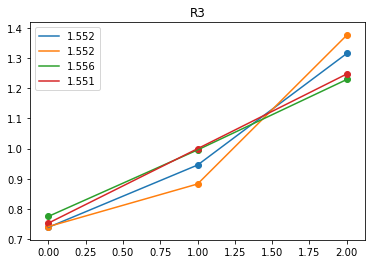

In [171]:
Q = pickle.load(open('sav-arr_3.txt', 'r'))
#print(Q)
len(Q) #, Q[0:2], Q[39:]

for item in Q:
    k, arr = item[0], item[1]
    if k <= 1.55:
        continue
    #min inf norm,                     volume
    #print(koml_norm(arr, gen_eps(3)), np.linalg.det(arr))
    print k, np.linalg.det(arr)
    print('arr: ', arr)
    B = np.matrix(arr)
    X = np.dot(B, B.T)
    print('X: ', X)
    es = np.sort(np.linalg.eigvals(X))
    print('es: ', es)
    plt.plot(range(len(es)), es, label='%.3f'%k)
    plt.scatter(range(len(es)), es)
    plt.legend(loc=0)
    plt.title('R'+str(len(es)))

#plot_identity_n(3)


1.55192013618 -0.958878925927
('es: ', array([-0.92112574+0.j        ,  0.95906148-0.34811923j,
        0.95906148+0.34811923j]))
1.55215448192 -0.949029250797
('es: ', array([-1.01790142+0.j        ,  0.74535489-0.61382827j,
        0.74535489+0.61382827j]))
1.55591226015 -0.974084833194
('es: ', array([-0.93401196+0.j        ,  0.97041447-0.31811914j,
        0.97041447+0.31811914j]))
1.55127288102 -0.969062417745
('es: ', array([-1.01767080+0.j        ,  0.43415198-0.87392661j,
        0.43415198+0.87392661j]))


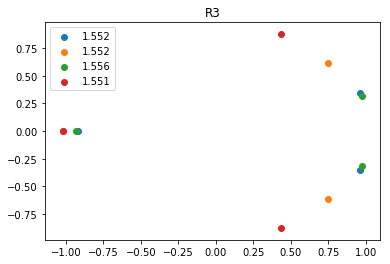

In [18]:
Q = pickle.load(open('sav-arr_3.txt', 'r'))
#print(Q)
len(Q) #, Q[0:2], Q[39:]

for item in Q:
    k, arr = item[0], item[1]
    if k <= 1.55:
        continue
    #min inf norm,                     volume
    #print(koml_norm(arr, gen_eps(3)), np.linalg.det(arr))
    print k, np.linalg.det(arr)
    B = np.matrix(arr)
    es = np.sort(np.linalg.eigvals(B))
    print('es: ', es)
    #plt.plot( es, label='%.3f'%k)
    plt.scatter(es.real, es.imag, label='%.3f'%k)
plt.legend(loc=0)
plt.title('R'+str(len(es)))
#plot_identity_n(3)


In [135]:
#Squares of eigenvalues
arr = np.array([-0.93401196+0.j,0.97041447-0.31811914j,0.97041447+0.31811914j])
print(arr.conj())
arr.conj() * arr

[-0.93401196-0.j          0.97041447+0.31811914j  0.97041447-0.31811914j]


array([ 0.87237834+0.j,  1.04290403+0.j,  1.04290403+0.j])

In [49]:
arr = np.array([ 0.77553741,  0.99563139,  1.2288312 ])
print (arr[1:] - arr[:-1], max(arr)-min(arr))

arr = np.array([ 0.74169995,  0.88284547,  1.37545458])
print (arr[1:] - arr[:-1], max(arr)-min(arr))

arr = np.array([ 0.73945434,  0.94560711,  1.31493856])
print (arr[1:] - arr[:-1], max(arr)-min(arr))

arr = np.array([ 0.75329246,  0.99971287,  1.24699466])
print (arr[1:] - arr[:-1], max(arr)-min(arr))


(array([ 0.22009398,  0.23319981]), 0.45329378999999992)
(array([ 0.14114552,  0.49260911]), 0.63375462999999999)
(array([ 0.20615277,  0.36933145]), 0.5754842200000001)
(array([ 0.24642041,  0.24728179]), 0.49370219999999987)


In [137]:
a = 1./2
A = a * np.matrix([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]])
eps = gen_eps(4)
print (A)
print (eps)
koml_norm(A, eps)

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
set([(-1, -1, 1, 1), (-1, -1, -1, 1), (-1, 1, 1, -1), (-1, -1, -1, -1), (1, -1, 1, 1), (1, -1, 1, -1), (-1, 1, 1, 1), (-1, -1, 1, -1)])


1.0

In [4]:
def plot_identity_n(n):
    a = 1./np.sqrt(n)
    arr1 = np.array([a]*n)
    arr = np.array([arr1]*n)
    B = np.matrix(arr)
    X = np.dot(B, B.T)
    es = np.sort(np.linalg.eigvals(X))
    print('es hadm: ', es)
    plt.plot(range(len(es)), es, label='identity')
    plt.legend(loc=0)
    vol = np.linalg.det(arr)
    np.dot(B, B.T), vol

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


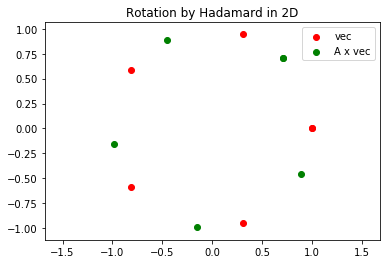

In [129]:
theta = np.linspace(0, 2*np.pi, 6)
x = np.cos(theta)
y = np.sin(theta)
plt.scatter(x, y, color='r', label='vec')
plt.axis('equal')

h = 1./np.sqrt(2)
arr = h * np.array([[1, 1], [1,-1]])
A = np.matrix(arr)
print A

cols = np.column_stack((x,y))
#print cols

B = np.dot(A, cols.T)
C = np.asarray(B)
plt.scatter(C[0], C[1],color='g', label='A x vec')

D = np.dot(np.dot(A.T, A), cols.T)
E = np.asarray(D)
#plt.scatter(E[0], E[1], color='y', label='A.T A x vec')
plt.legend(loc=0)
plt.title('Rotation by Hadamard in 2D')

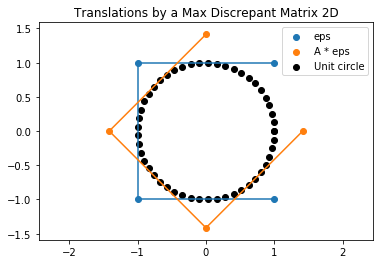

In [132]:
eps = np.matrix([[1, 1], [-1, 1], [-1,-1], [1, -1] ])
U = np.dot(A, eps.T)
U = np.asarray(U)
plt.scatter(np.asarray(eps)[:,0], np.asarray(eps)[:,1], label='eps')
plt.plot(np.asarray(eps)[:,0], np.asarray(eps)[:,1])
plt.scatter(U[0], U[1], label='A * eps')
plt.plot(U[0], U[1])
plt.axis('equal')

theta = np.linspace(0, 2*np.pi, 50)
x = np.cos(theta)
y = np.sin(theta)
plt.scatter(x, y, color='k', label='Unit circle')

plt.legend(loc=0)
plt.title('Translations by a Max Discrepant Matrix 2D')

In [167]:
#nxn matrix
# def symm_rand_mx(n):
#     b = np.random.randn(n, n)
#     c = (b + b.T)/(n*1.)
#     for i in range(n):
#         c[i,i] = 1.
#     return c
def symm_rand_mx(n):
    A = gen_rand_vecs(n)
    C = np.dot(A, A.T)
    #print C
    return C
print(symm_rand_mx(3))

def smart_choice(n):
    eps = gen_eps(n)
    while True:
        B = symm_rand_mx(n)
        es, ev = np.linalg.eigh(B)
        if max(es) < 1.05 and min(es) > 0.95:
            print(es)
            print(ev)
            print(koml_norm(ev, eps))
            print(koml_norm(ev.T, eps))
            return
        
smart_choice(3)
    

[[ 1.          0.76614196 -0.66499785]
 [ 0.76614196  1.         -0.03155569]
 [-0.66499785 -0.03155569  1.        ]]
[ 0.96215455  1.00846086  1.02938459]
[[ 0.64816196 -0.23344921  0.72483621]
 [-0.43250745 -0.89627876  0.09809018]
 [ 0.62675623 -0.37707539 -0.68190233]]
1.30864836123
1.23069603744


In [169]:
alpha = np.pi/4.
beta = np.arccos(np.sqrt(2./3.))
#print(np.rad2deg(beta))

A1 = np.matrix([[1,0,0], [0,np.cos(alpha), np.sin(alpha)], [0, -np.sin(alpha), np.cos(alpha)]])
A2 = np.matrix([[np.cos(beta), 0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]])
#print A1
#print A2
eps = gen_eps(3)
#print koml_norm(np.dot(A2, A1), eps)
def create_A1(rot):
    return np.matrix([[1,0,0], [0,np.cos(rot), np.sin(rot)],[0, -np.sin(rot),np.cos(rot)]])
def create_A2(rot):
    return np.matrix([[np.cos(rot), 0, np.sin(rot)],[0,1,0],[-np.sin(rot),0,np.cos(rot)]])
r, b, c = 0, 0, 0
cross = np.linspace(0, np.pi/2., 10)
for h in cross:
    A1 = create_A1(h)
    angle = np.linspace(beta-.4, beta + 2.5, 5000)
    for a in angle:
        d = koml_norm(np.dot(create_A2(a), A1), eps)
        if d > b:
            r, b, c = h, d, a
print np.rad2deg(r), b, np.rad2deg(c)

#1.41421356225 for A1:=pi/4



0.0 1.41421355706 134.995034983


In [172]:
## Best in R3
#1.55591226015 -0.974084833194
#('arr: ', array([[ 0.78662757, -0.47237161, -0.39759545],
#       [-0.0045694 ,  0.57096135, -0.82096422],
#       [-0.7738541 , -0.52736029, -0.35077195]]))
#('X: ', matrix([[ 1.        ,  0.05311128, -0.22015961],
#        [ 0.05311128,  1.        , -0.00959507],
#        [-0.22015961, -0.00959507,  1.        ]]))

np.rad2deg(np.arccos([0.05311128, -0.22015961,-0.00959507]))

array([  86.95551535,  102.71840783,   90.54976545])

In [184]:
cor13 = np.linspace(-0.22015, -0.4,200)
for c in cor13:
    M = np.matrix([[ 1.        ,  0.05311128, c],
        [ 0.05311128,  1.        , -0.00959507],
        [c, -0.00959507,  1.        ]])
    w,v = np.linalg.eigh(M)
print v, w
print np.dot(v, v.T).dot(np.diag(w))
print(np.dot(v.T, v))

[[-0.70801431 -0.02295077 -0.70582505]
 [ 0.07671499  0.99105746 -0.1091784 ]
 [-0.70201891  0.13144724  0.69992219]] [ 0.59763243  0.99749743  1.40487014]
[[  5.97632435e-01  -4.75794145e-17   1.52596456e-16]
 [ -2.85063404e-17   9.97497430e-01   1.93441753e-16]
 [  6.49146061e-17   1.37349102e-16   1.40487014e+00]]
[[  1.00000000e+00  -1.06073840e-16   1.56031781e-16]
 [ -1.06073840e-16   1.00000000e+00   1.72652061e-16]
 [  1.56031781e-16   1.72652061e-16   1.00000000e+00]]


In [152]:
arr = np.array([[-0.30513515,  0.50427787, -0.80783437],
          [-0.27413916,  0.64625333,  0.7121828 ],
          [-0.92578078, -0.37803571,  0.00435248]])

vol = np.linalg.det(arr)
#1.505055
B = np.matrix(arr)
np.dot(B, B.T), vol

(matrix([[ 1.        , -0.165785  ,  0.08833713],
         [-0.165785  ,  0.99999999,  0.01258569],
         [ 0.08833713,  0.01258569,  0.99999999]]), -0.98192913829868433)

In [66]:
arr = np.array([[-0.41079461,  0.68748527, -0.59884205],
          [ 0.71551537,  0.03530686, -0.69770422],
          [ 0.41994239,  0.8745289 ,  0.24258522]])
vol = np.linalg.det(arr)
#1.5267
B = np.matrix(arr)
np.dot(B, B.T), vol

(matrix([[ 1.00000001,  0.14815771,  0.28344544],
         [ 0.14815771,  1.        ,  0.16209937],
         [ 0.28344544,  0.16209937,  1.        ]]), -0.94076903596067385)

In [67]:
arr = np.array([[ 0.66725528, -0.12287851, -0.73462322],
          [ 0.44990458, -0.77549492,  0.44293735],
          [-0.38724751, -0.85416577, -0.34704495]])
vol = np.linalg.det(arr)
#1.5044
B = np.matrix(arr)
np.dot(B, B.T), vol

(matrix([[ 1.00000001,  0.0701008 ,  0.10151295],
         [ 0.0701008 ,  1.        ,  0.33445762],
         [ 0.10151295,  0.33445762,  0.99999999]]), 0.93684534365383088)

(1.6014319743786405, -0.9723302987929735)
('X: ', matrix([[ 1.        , -0.01333303,  0.01403244, -0.21686778],
        [-0.01333303,  1.        , -0.04067626,  0.07539108],
        [ 0.01403244, -0.04067626,  1.        ,  0.01342172],
        [-0.21686778,  0.07539108,  0.01342172,  1.        ]]))
('es: ', array([ 0.77097209,  0.96268033,  1.03185103,  1.23449654]))
(1.6118917681174609, 0.959835019587995)
('X: ', matrix([[ 1.        ,  0.00815287, -0.02184539, -0.22101588],
        [ 0.00815287,  1.        ,  0.1234236 ,  0.05058967],
        [-0.02184539,  0.1234236 ,  1.        ,  0.1213937 ],
        [-0.22101588,  0.05058967,  0.1213937 ,  1.        ]]))
('es: ', array([ 0.75649912,  0.87361852,  1.08451646,  1.2853659 ]))
(1.6206396437860395, -0.99735129936771916)
('X: ', matrix([[ 1.        , -0.01189214, -0.00407633,  0.02197747],
        [-0.01189214,  1.        ,  0.04278435,  0.04955263],
        [-0.00407633,  0.04278435,  1.        , -0.01659192],
        [ 0.02197747,  0.

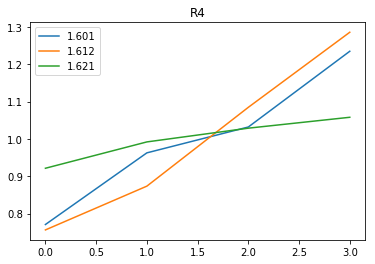

In [42]:
Q = pickle.load(open('sav2-arr_4.txt', 'r'))
len(Q) , Q

#Q[1]
#eps = gen_eps(4)
for item in Q:
    k, arr = item[0], item[1]
    #min inf norm,     volume
    print(k, np.linalg.det(arr))
    B = np.matrix(arr)
    X = np.dot(B, B.T)
    es = np.sort(np.linalg.eigvals(X))
    print('X: ', X)
    print('es: ', es)
    plt.plot(es, label='%.3f'%k)
    plt.legend(loc=0)
    plt.title('R'+str(len(es)))

#plot_identity_n(4)

(1.6014319743786405, -0.9723302987929735)
('X: ', matrix([[ 1.        , -0.2463322 , -0.01584133],
        [-0.2463322 ,  1.        ,  0.00224182],
        [-0.01584133,  0.00224182,  1.        ]]))
('es: ', array([-1.05530457+0.j        ,  0.59186331-0.80317425j,
        0.59186331+0.80317425j,  0.92564032+0.j        ]))
(1.6118917681174609, 0.959835019587995)
('X: ', matrix([[ 1.        , -0.2463322 , -0.01584133],
        [-0.2463322 ,  1.        ,  0.00224182],
        [-0.01584133,  0.00224182,  1.        ]]))
('es: ', array([-0.91744595-0.21288576j, -0.91744595+0.21288576j,
        0.85697226-0.58964311j,  0.85697226+0.58964311j]))
(1.6206396437860395, -0.99735129936771916)
('X: ', matrix([[ 1.        , -0.2463322 , -0.01584133],
        [-0.2463322 ,  1.        ,  0.00224182],
        [-0.01584133,  0.00224182,  1.        ]]))
('es: ', array([-1.00579133+0.j        , -0.61685736-0.78586556j,
       -0.61685736+0.78586556j,  0.99349852+0.j        ]))


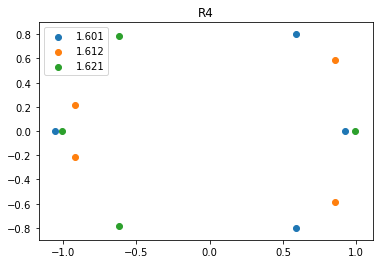

In [19]:
Q = pickle.load(open('sav2-arr_4.txt', 'r'))
len(Q) , Q

#Q[1]
#eps = gen_eps(4)
for item in Q:
    k, arr = item[0], item[1]
    #min inf norm,     volume
    print(k, np.linalg.det(arr))
    B = np.matrix(arr)
    es = np.sort(np.linalg.eigvals(B))
    print('X: ', X)
    print('es: ', es)
    plt.scatter(es.real, es.imag, label='%.3f'%k)
    plt.legend(loc=0)
    plt.title('R'+str(len(es)))
#plot_hadamard_n(4)

In [37]:
def matr_vol(arr):
    #print(arr)
    one = np.ones(len(arr))
    #print (one)
    reals = np.array(arr.real)
    #print(reals)
    imgs = np.array(arr.imag)
    #print(imgs)
    B = np.vstack((one.T, reals.T, imgs.T))
    print B
    return np.linalg.det(B)
matr_vol(es)

[[ 1.          1.          1.          1.        ]
 [-1.00579133 -0.61685736 -0.61685736  0.99349852]
 [ 0.         -0.78586556  0.78586556  0.        ]]


LinAlgError: Last 2 dimensions of the array must be square

In [174]:
arr = np.array([ 0.92147169,  0.9919386 ,  1.02873397,  1.05785574])
max(arr) - min(arr)

0.13638404999999998

In [ ]:
s= Q[0][1]
a1, b1, c1 = get_spherical(s)
#a1

In [ ]:
a = Q[0][1][0]
b = Q[0][1][1]
c = Q[0][1][2]
u = np.rad2deg(angular_sep(a, b)), np.rad2deg(angular_sep(b, c)), np.rad2deg(angular_sep(c, a))
a, u, np.sum(u)

In [ ]:
t = []
norm = []
for i in range(len(Q)):
    w = Q[i][0]
    v = Q[i][1]
    a, b, c = v[0], v[1], v[2]
    u = np.rad2deg(angular_sep(a, b)), np.rad2deg(angular_sep(b, c)), np.rad2deg(angular_sep(c, a))
    t += np.sum(u),
    norm += w,
    print(w, u)
print(np.max(t), np.min(t))
print(np.max(norm), t[np.argmax(norm)], np.min(norm), t[np.argmin(norm)])
print('max: ', Q[np.argmax(norm)][1], Q[np.argmax(norm)][0])
print('min: ', Q[np.argmin(norm)][1], Q[np.argmin(norm)][0])

In [27]:
t = []
norm = []
for i in range(len(Q)):
    w = Q[i][0]
    v = Q[i][1]
    a, b, c = v[0], v[1], v[2]
    u = np.rad2deg(angular_sep(a, b)), np.rad2deg(angular_sep(b, c)), np.rad2deg(angular_sep(c, a))
    t += np.sum(u),
    norm += w,
    print(w, u)
print(np.max(t), np.min(t))
print(np.max(norm), t[np.argmax(norm)], np.min(norm), t[np.argmin(norm)])
print('max: ', Q[np.argmax(norm)][1], Q[np.argmax(norm)][0])
print('min: ', Q[np.argmin(norm)][1], Q[np.argmin(norm)][0])

(1.5240868528507501, (98.005735349631706, 74.618242590205625, 93.788425810471011))
(1.5029805637245959, (94.655559567711236, 84.006417060984148, 110.30167016897312))
(1.5226569450832352, (92.302118415017532, 86.557263908711036, 79.30060988549414))
(1.5065499024017686, (92.274834922152451, 107.21563855592551, 90.023211064322879))
(1.5003648887179155, (94.055183561511654, 85.069635846060564, 79.448674476717642))
(1.5098894183716398, (75.584929631085942, 84.250590096769415, 82.645679624290963))
(1.5169994732228895, (75.476642756021008, 97.229268851471886, 101.81635106314602))
(1.5107583386603811, (93.55444764639077, 100.02899235967651, 88.315597242550808))
(1.5131506712675056, (95.648767163178164, 93.192119926337057, 72.19699567175077))
(1.5016860467750757, (92.558659132417361, 97.585954269140316, 73.96035732776771))
(1.5141152488039413, (76.050518345432749, 77.59479277033455, 83.537697844943807))
(1.5152088472278475, (85.934765730473146, 91.342161513269019, 79.230350706965552))
(1.532945

In [49]:
arr = np.array([[ 0.02755415, -0.61465067,  0.78831803],
       [ 0.85340382,  0.36455524,  0.3725606 ],
       [ 0.72094127, -0.57917848, -0.38052067]])
koml_norm(arr, gen_eps(3))

1.5413993000000001

In [ ]:
get_spherical(arr)

In [ ]:
plot_cartesian(arr)

In [188]:
arr = np.array([[ 0.78662757, -0.47237161, -0.39759545],
          [-0.0045694 ,  0.57096135, -0.82096422],
          [-0.7738541 , -0.52736029, -0.35077195]])
koml_norm(arr, gen_eps(3))

1.5559122700000001

In [39]:
## Volume of tetrahedron
np.linalg.det([[ 0.78662757, -0.47237161, -0.39759545],
          [-0.0045694 ,  0.57096135, -0.82096422],
          [-0.7738541 , -0.52736029, -0.35077195]])

-0.97408483865920936

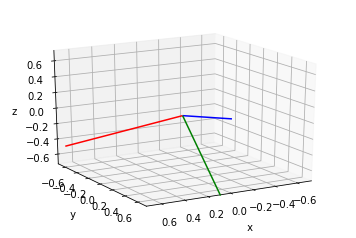

In [198]:
plot_cartesian(arr)
#plot_cartesian(np.array([[1,0,0],[0,1,0],[0,0,1]]))

(10, 20)


NameError: global name 'e1' is not defined

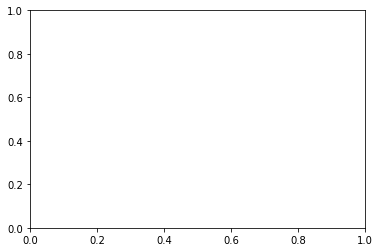

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

# t = np.linspace(0,2*np.pi)
# x = np.sin(t)

fig, ax = plt.subplots()
xyz = np.array([[ 0.78662757, -0.47237161, -0.39759545],
          [-0.0045694 ,  0.57096135, -0.82096422],
          [-0.7738541 , -0.52736029, -0.35077195]])

def plot_live(abc, el, az):
    a, b, c = abc[0], abc[1], abc[2]
    X = [0, a[0], 0, b[0], 0, c[0]] 
    Y = [0, a[1], 0, b[1], 0, c[1]]
    Z = [0, a[2], 0, b[2], 0, c[2]]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #ax.plot_wireframe(X, Y, Z, color='r')
    for t in range(3):
        s = 2*t 
        e = s + 2
        c = {0:'r', 1:'g', 2:'b'} #rgb
        ax.plot_wireframe(X[s:e], Y[s:e], Z[s:e], color=c[t])
    ax.set_xlabel('\n x')
    ax.set_ylabel('\n y')
    ax.set_zlabel('\n z')
    ax.set_xlim3d(-0.7,0.7)
    ax.set_ylim3d(-0.7,0.7)
    ax.set_zlim3d(-0.7,0.7)
    ax.view_init(elev=el, azim=az)
    
def animate(framenumber, xyz, el, az):
    ax.clear()
    print(el, az)
    if az >=60:
        el = el + 5
        az = 5
    az = az + 5
    plot_live(xyz, e1, az)
    

ani = matplotlib.animation.FuncAnimation(fig, animate, fargs=(xyz, 10, 20), interval=10)
ani

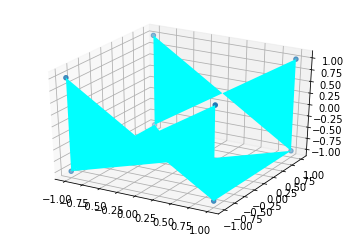

In [32]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
#
#                    0        1      2         3         4         5        6          7
#
verts = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1],[-1,1,1],[-1,1,-1],[-1,-1,1],[-1,-1,-1]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(verts[:,0], verts[:,1], verts[:,2])
sides = [ [verts[0],verts[1],verts[4], verts[5]] , 
         [ verts[2] , verts[3], verts[6], verts[7] ], 
         [ verts[1] , verts[3], verts[5], verts[7] ], 
        ]
ax.add_collection3d(Poly3DCollection(sides,facecolors='cyan'))

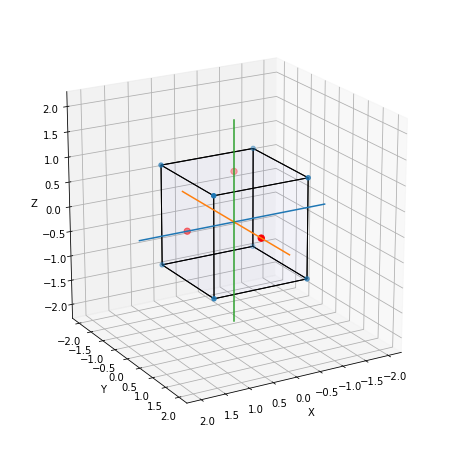

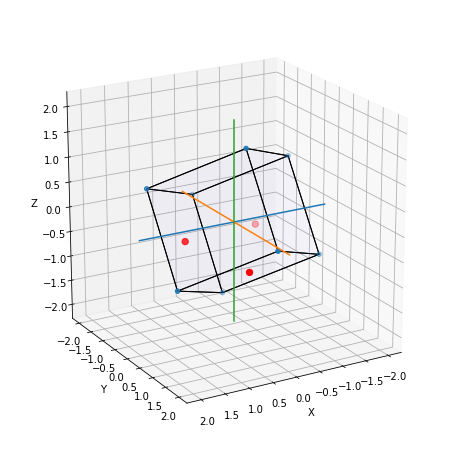

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import itertools

def post_transformation(cube_definition, transformation_mx):
    tx_cube = []
    for v in cube_definition:
        u = np.dot(transformation_mx, v)
        tx_cube += u.tolist(),
    return tx_cube

def plot_cube(cube_definition, transformation_mx):
    cube_definition = post_transformation(cube_definition, transformation_mx)
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    #faces.set_facecolor((0,0,1,0.1))
    faces.set_facecolor((0,0,1,0.01))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter3D(points[:,0], points[:,1], points[:,2] )

    ax.set_aspect('equal')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    bg, en = -2, 3
    rn = range(bg, en)
    ln = en - bg
    zn = [0]*ln
    ax.plot3D(rn, zn, zn)
    ax.plot3D(zn, rn, zn)
    ax.plot3D(zn, zn, rn)
    ax.view_init(elev=20, azim=60)

    #coord_inters = np.array([ [1,0,0], [0,-1,0], [0,0,1], [0,0,-1] ])
    cs = itertools.cycle(["r", "g", "b"])
    coord_inters = transformation_mx
    ax.scatter3D(coord_inters[0,:], coord_inters[1,:], coord_inters[2,:], color=next(cs),s=40)
    
# cube_definition = [
#     # x along the regular way
#     # y into the page
#     # z running vertical
#      #bottom left, #bottom far into the page, #bottom right, #top left corner
#     (0,0,0), (0,1,0), (1,0,0), (0,0,1)
# ]

#Corners of the cube
cube_definition = [
    # x along the regular way
    # y into the page
    # z running vertical
     #bottom left, #bottom far into the page, #bottom right, #top left corner
    (-1,-1,-1), (-1,1,-1), (1,-1,-1), (-1,-1,1)
]

A = np.transpose(np.eye(3,3))
plot_cube(cube_definition, A)


A = np.transpose(np.array([[ 0.78662757, -0.47237161, -0.39759545],
          [-0.0045694 ,  0.57096135, -0.82096422],
          [-0.7738541 , -0.52736029, -0.35077195]]))
plot_cube(cube_definition, A)


# print(A)
# tx_cube = []
# for v in cube_definition:
#     u = np.dot(A, v)
#     #print (u)
#     tx_cube += u.tolist(),
#     #allv = np.column_stack(allv,u)
# print tx_cube
#plot_cube(tx_cube)


In [129]:
def coord_intersections_under_tx(A):
    '''
    A is n x n matrix
    '''
    #print (A)
    e_vecs = unit_vecs(A)
    P = projection_mx(A)
    print('Proj: ', P)
    return np.dot(P, e_vecs)
        

def unit_vecs(A):
    '''
    Return list of unit vectors length n, where A is n x n
    '''
    vecs = []
    n = A.shape[0]
    zeros = [0]*n
    for c in range(n):
        arr = zeros[:]
        arr[c] = 1
        #print(zeros)
        vecs += arr,
        
    return np.asarray(vecs)
    
def projection_mx(A):
    return np.dot(np.dot(A, np.linalg.inv(np.dot(A.T, A))), A.T)

A = np.transpose(np.array([[ 0.78662757, -0.47237161, -0.39759545],
          [-0.0045694 ,  0.57096135, -0.82096422],
          [-0.7738541 , -0.52736029, -0.35077195]]))
#coord_int_under_tx(A)
#projection_mx(np.array([[1,0,0],[0,1,0],[0,0,1]]))
#projection_mx(np.array([[0,1],[1,0]]))
#print(unit_vecs(np.array([[2,3],[-9,4.5]])))
print coord_intersections_under_tx(np.array([[0,1,0],[1,0,0],[0,0,1]]))
print coord_intersections_under_tx(A)
print np.dot(A, np.array([-1,0,0]))

('Proj: ', array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]]))
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
('Proj: ', array([[  1.00000000e+00,   5.52050537e-17,   3.72013557e-17],
       [  5.80369691e-17,   1.00000000e+00,  -8.78273416e-17],
       [  2.89264259e-17,  -9.10385675e-17,   1.00000000e+00]]))
[[  1.00000000e+00   5.52050537e-17   3.72013557e-17]
 [  5.80369691e-17   1.00000000e+00  -8.78273416e-17]
 [  2.89264259e-17  -9.10385675e-17   1.00000000e+00]]
[-0.78662757  0.47237161  0.39759545]


[[-2.77335885 -1.18901051 -2.06478522]
 [ 1.35661923 -1.18902313 -2.04328971]
 [ 1.35665153  1.18892083 -2.04313264]
 [-2.77332655  1.18893345 -2.06462815]
 [-1.35665153 -1.18892083  2.04313264]
 [ 2.77332655 -1.18893345  2.06462815]
 [ 2.77335885  1.18901051  2.06478522]
 [-1.35661923  1.18902313  2.04328971]]


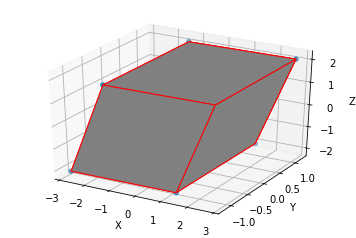

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt

points = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])

P = [[2.06498904e-01 , -6.30755443e-07 ,  1.07477548e-03],
 [1.61535574e-06 ,  1.18897198e-01 ,  7.85307721e-06],
 [7.08353661e-02 ,  4.48415767e-06 ,  2.05395893e-01]]

Z = np.zeros((8,3))
for i in range(8): Z[i,:] = np.dot(points[i,:],P)
Z = 10.0*Z

print(Z) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = [-1,1]

X, Y = np.meshgrid(r, r)
# plot vertices
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

# list of sides' polygons of figure
verts = [[Z[0],Z[1],Z[2],Z[3]],
 [Z[4],Z[5],Z[6],Z[7]], 
 [Z[0],Z[1],Z[5],Z[4]], 
 [Z[2],Z[3],Z[7],Z[6]], 
 [Z[1],Z[2],Z[6],Z[5]],
 [Z[4],Z[7],Z[3],Z[0]], 
 [Z[2],Z[3],Z[7],Z[6]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='gray', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

bg, en = -4, 4
rn = range(bg, en)
ln = en - bg
zn = [0]*ln
ax.plot3D(rn, zn, zn)
ax.plot3D(zn, rn, zn)
ax.plot3D(zn, zn, rn)

plt.show()

In [15]:
# Calculation by hand using sequential orthogonal vectors to form A. Start with 1/sqrt(n) project to each coordinate
A = np.matrix([[.57735,.57735,.57735],[.40825,.40825,-.8165],[.70711,-0.70711,0]])
eps=gen_eps(3)
koml_norm(A, eps)

1.39385

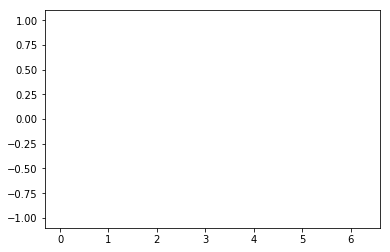

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
ani

In [1]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [222]:
get_spherical(arr)

array([[ 1.00000001,  1.97969109, -0.54078871],
       [ 1.        ,  2.53389402,  1.57879915],
       [ 1.        ,  1.92919163, -2.54340978]])

In [49]:
np.rad2deg(get_spherical(arr)[:,1:3])

array([[ 113.42794409,  -30.98491042],
       [ 145.18143295,   90.45852796],
       [ 110.53453824, -145.72664578]])

In [43]:
koml_norm(np.array([[ 0.57735026918962573,  0.57735026918962573,  0.57735026918962573 ],
       [ 0.57735026918962573,  0.57735026918962573,  -0.57735026918962573],
       [ 0.57735026918962573, -0.57735026918962573,  -0.57735026918962573]]), 
          gen_eps(3))

0.57735026918962573

In [ ]:
a = [ 0.02755415, -0.61465067,  0.78831803]
b = [ 0.85340382,  0.36455524,  0.3725606 ]
c = [ 0.72094127, -0.57917848, -0.38052067]

In [ ]:
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
#(0,0,0) after each column makes it so that 
#the vectors are drawn from the origin to tip
X = [0, a[0], 0, b[0], 0, c[0]] 
Y = [0, a[1], 0, b[1], 0, c[1]]
Z = [0, a[2], 0, b[2], 0, c[2]]
ax.plot_wireframe(X, Y, Z, color='r')
#ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet') )

In [ ]:
X

In [ ]:
import mpl_toolkits.mplot3d.axes3d as axes3d

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
#print(theta)
#print(THETA)
R = 1 # np.cos(PHI**2)
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

In [42]:
def to_cart_deg(R, deg_theta, deg_phi):
    return to_cartesian(R, np.deg2rad(deg_theta), np.deg2rad(deg_phi))

def to_cartesian(R, THETA, PHI):
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    
    X = np.ndarray.flatten(X)
    Y = np.ndarray.flatten(Y)
    Z = np.ndarray.flatten(Z)
    return zip(X, Y, Z)
    
def vec_comps():
    n1, n2 = 5, 4
    theta, phi = np.linspace(0, 2 * np.pi, n1), np.linspace(0, np.pi, n2)
    THETA, PHI = np.meshgrid(theta, phi)
    return to_cartesian(1, THETA, PHI)

import itertools
def vecs_3Dspan():
    V = vec_comps()
    #print('V: ', V)
    print('len V: ', len(V))
    items = itertools.combinations(range(len(V)), 3)
    U = []
    for t in items:
        U += (V[t[0]], V[t[1]], V[t[2]]),
    return U

def compute_koml3():
    n = 3
    k = []
    H = []
    eps_vecs = gen_eps(n)
    for U in vecs_3Dspan():
        nm = koml_norm(U, eps_vecs)
        k.append(nm)
        if nm >= 1.5:
            H.append((nm, U))
    print('len k: ', len(k))
    return k, H

In [45]:
## Try out Apr 17
def gen_all_point_vecs(vec):
    n = len(vecs)
    eps_vecs = gen_eps(n)
    
def point_koml(vec):
    n = len(vecs)
    eps_vecs = gen_eps(n)
    for i in range(len(eps_vecs)):
        U = gen_all_point_vecs(vec, eps_vecs)
        nm = koml_norm(U, eps_vecs)
        k.append(nm)
        if nm > 1.5:
            H.append((nm, U))
    return k, H

to_cart_deg([1], [30], [30])

[(0.4330127018922193, 0.24999999999999994, 0.86602540378443871)]

In [27]:
import numpy as np
from scipy.optimize import minimize

eps_vecs = gen_eps(3)
print(eps_vecs)
def convert2xyz(phi, theta):
    '''
    return x, y, z from phi and theta. r is 1
    '''
    return np.sin(phi)*np.cos(theta), np.sin(phi)*np.sin(theta), np.cos(phi)

def f0(x):
    g = 1e9
    for eps in eps_vecs:
        g = min(g, g0(x, eps))
    return -g
        
def g0(x, epsilon):
    '''
    return the infinity norm (max of x, y, z of the sum)
    '''
    alpha1, alpha2 = x[0], x[1]
    beta1, beta2 = x[2], x[3]
    gamma1, gamma2 = x[4], x[5]
    one = np.cos(alpha1)*epsilon[0] + np.cos(beta1)*epsilon[1] \
        + np.cos(gamma1)*epsilon[2]
    two = np.sin(alpha1)*np.cos(alpha2)*epsilon[0] \
        + np.sin(beta1)*np.cos(beta2)*epsilon[1] + np.sin(gamma1)*np.cos(gamma2) * epsilon[2]
    three = np.sin(alpha1)*np.sin(alpha2)*epsilon[0] \
        + np.sin(beta1)*np.sin(beta2)*epsilon[1] + np.sin(gamma1)*np.sin(gamma2)*epsilon[2]
        
    return max(abs(one), abs(two), abs(three))

bounds = ((0, np.pi), (0, 2*np.pi), (0, np.pi), (0, 2*np.pi), (0,np.pi), (0, 2*np.pi))
eps = [1, 1, 1]

##Nelder-Mead
#res = minimize(f0, [np.pi/180.]*6, method='Nelder-Mead', bounds=bounds, options={'disp': True, 'maxiter':1e6})
res = minimize(f0, [0]*6, method='L-BFGS-B', bounds=bounds, options={'disp': True, 'eps': 1e-18, 'maxiter': 1e6})
print(res.x)
print(f0(res.x))


set([(1, 1, 1), (1, 1, -1), (1, -1, 1), (-1, 1, 1)])
[ 0.  0.  0.  0.  0.  0.]
-1.0


In [26]:
ranges=(slice(0, np.pi, .6), slice(0, 2*np.pi, .6))*3
#print(ranges)
from scipy import optimize
resbrute = optimize.brute(f0, ranges, full_output=True)
print(resbrute[0], resbrute[1])

(array([ 0.80755173,  3.14159265,  1.11269372,  1.180776  ,  1.11752979,
        5.31263246]), -1.5714085573238803)


In [28]:
#initial best at 1.57
np.rad2deg(np.array([1.11912311, 4.21613666, 2.00459944, 5.23318851, 2.3725073 ,
       3.14579145]))


array([  64.12103096,  241.56683647,  114.85508753,  299.83961502,
        135.93465515,  180.24057331])

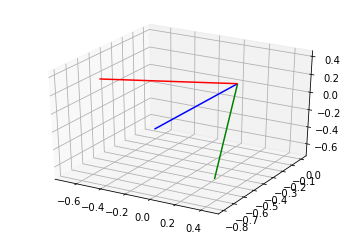

In [36]:
plot_spherical(np.array([1.11912311, 4.21613666, 2.00459944, 5.23318851, 2.3725073 ,
       3.14579145]))

In [41]:
spherical2cartesian([1.11912311, 4.21613666, 2.00459944, 5.23318851, 2.3725073 ,
       3.14579145])

[[-0.42838570761478117, -0.79118787658838563, 0.43647156774633639],
 [0.4514854400052889, -0.78707563911173883, -0.42032467900431281],
 [-0.69547218252186815, -0.0029201632641119081, -0.71854708682505986]]

In [42]:
np.linalg.det([[-0.42838570761478117, -0.79118787658838563, 0.43647156774633639],
 [0.4514854400052889, -0.78707563911173883, -0.42032467900431281],
 [-0.69547218252186815, -0.0029201632641119081, -0.71854708682505986]])

-0.96919876191524024

In [4]:
import timeit
start_time = timeit.default_timer()
k, H = compute_koml3()
save_fig(k, 3)
save_hivecs(H, 3)
elapsed = timeit.default_timer() - start_time
print elapsed

('len V: ', 20)
('len k: ', 1140)
0.276294946671


In [5]:
gamma = np.array([[0, 0],[-1, 2]])
beta = np.array([[-1, 1], [.5, -.5]])
delta = np.array([[-.25, .25], [.75, .6]])
np.meshgrid(np.meshgrid(gamma, beta), delta)

[array([[ 0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,
          2. ,  0. ,  0. , -1. ,  2. , -1. , -1. , -1. , -1. ,  1. ,  1. ,
          1. ,  1. ,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,
          2. ,  0. ,  0. , -1. ,  2. , -1. , -1. , -1. , -1. ,  1. ,  1. ,
          1. ,  1. ,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,
          2. ,  0. ,  0. , -1. ,  2. , -1. , -1. , -1. , -1. ,  1. ,  1. ,
          1. ,  1. ,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,  2. ,  0. ,  0. , -1. ,
          2. ,  0. ,  0. , -1. ,  2. , -1. , -1. , -1. , -1. ,  1. ,  1. ,
          1. ,  1. ,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5]]),
 array([[-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
         -0.25, -0.25, -0.25, -0.25, -0.25, -0

In [6]:
np.cos(np.arctan(np.sqrt(2)))

0.57735026918962573

In [7]:
np.rad2deg(2*np.arcsin(1./np.sqrt(6)))

48.189685104221411

In [8]:
180-48.1896851

131.8103149

In [9]:
s = {(1, 1, 1), (1, 1, -1), (1, -1, 1), (1, -1, -1), (-1, 1, 1), (-1, 1, -1), (-1, -1, 1), (-1, -1, -1)}
get_half_set(s)

{(-1, 1, 1), (1, -1, 1), (1, 1, -1), (1, 1, 1)}

## Miscellaneous


In [40]:

W = np.array([[0,1, 1], [1, 0, 1], [1, 0, 1]])
D = np.diag(np.sum(W, axis=1))
Dinv = np.linalg.inv(D)
M = np.dot(Dinv, W)
Dinvsq = np.sqrt(Dinv)
S = np.dot(np.dot(Dinvsq, W), Dinvsq)
l, v = np.linalg.eig(S)

D, Dinv, Dinvsq, M, S, l, v,

(array([[2, 0, 0],
        [0, 2, 0],
        [0, 0, 2]]), array([[ 0.5,  0. ,  0. ],
        [ 0. ,  0.5,  0. ],
        [ 0. ,  0. ,  0.5]]), array([[ 0.70710678,  0.        ,  0.        ],
        [ 0.        ,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  0.70710678]]), array([[ 0. ,  0.5,  0.5],
        [ 0.5,  0. ,  0.5],
        [ 0.5,  0. ,  0.5]]), array([[ 0. ,  0.5,  0.5],
        [ 0.5,  0. ,  0.5],
        [ 0.5,  0. ,  0.5]]), array([ -5.00000000e-01,   1.00000000e+00,  -5.55111512e-17]), array([[-0.81649658,  0.57735027, -0.57735027],
        [ 0.40824829,  0.57735027, -0.57735027],
        [ 0.40824829,  0.57735027,  0.57735027]]))

In [156]:
## For plotting sequential orthogonal additions to a vector, anti-clockwise
n = 20
x, y = 5.,5.
d = np.sqrt(x**2 + y**2)
for i in range(n):
    c = d
    alpha, beta = x * 1./c, -y * 1./c
    x += beta
    y += alpha
    d = np.sqrt(x**2 + y**2)
    print(alpha, beta)
    print(x, y)
    #print(d*1./c)

print(d*1./c)
print (1 + np.sqrt(5))/2.

1.00000024999
1.61803398875


In [158]:
## Same as above, but clockwise
n = 20
x, y = -0.282,7.477
d = np.sqrt(x**2 + y**2)
for i in range(n):
    c = d
    alpha, beta = -x * 1./c, y * 1./c
    x += beta
    y += alpha
    d = np.sqrt(x**2 + y**2)
    #print(alpha, beta)
    print(x, y)
    #print(d*1./c)

print(d*1./c)
print (1 + np.sqrt(5))/2.

(0.71728952232971732, 7.514688865226292)
(1.7127649072087974, 7.4196690878120739)
(2.6871407479058691, 7.1947430531565129)
(3.6239351815742005, 6.8448628035738439)
(4.5077132585323714, 6.3769564981150291)
(5.324298923278743, 5.7997322330925627)
(6.0609544554965176, 5.1234640711531236)
(6.7065268415563146, 4.3597649848913544)
(7.2515611139097595, 3.5213512195223982)
(7.6883812049362561, 2.6218023280909186)
(8.0111393120888721, 1.675320841601478)
(8.2158351624522421, 0.69649521420709026)
(8.3003068978351173, -0.29993066157163784)
(8.2641955777887528, -1.2992784351542426)
(8.1088855196173171, -2.2871442083394387)
(7.8374228641910832, -3.2495931819006025)
(7.4544148772605743, -4.1733382127112906)
(6.9659125713870989, -5.0459008162855543)
(6.3792792671663801, -5.8557534981846029)
(5.7030477078909678, -6.592442630885734)
1.00664591148
1.61803398875


In [191]:
#
# Create Latex plots starting sx, sy
# orthogonal at each step, maximizing infinity norm
# 

def nodeprint(px, py, x, y, c=0):
    #\draw[orange,thick,->](0,0) -- (3.493,6.308) node[right]{$S_{k+2}$} node[midway, below, sloped]{$7.21$};
    #str = '(%s, %s) node(n%s) {%s}' % (x, y, c, l)
    str = '\draw[orange,thick,->](%s,%s)--(%s,%s)'%(px,py,x,y)
    if c:
        str = str + 'node[right]{$%s$}'%(c) + ';'
    else:
        str = str + ';'
    print(str)

def tikz_print(n=20, sp=3,pr=False):
    infnorm = []
    maxx, maxy = 0, 0
    ct = 0
    sx, sy = 1./np.sqrt(2),1./np.sqrt(2) # 1/sqrt(2)
    d = np.sqrt(x**2 + y**2)
    for i in range(n):
        c = d
        infnorm += max(sx, sy),
        px, py = sx, sy
        dx, dy = sy * 1./c, sx * 1./c
        if sx >= sy:
            sx -= dx
            sy += dy
        else:
            sx += dx
            sy -= dy
        if pr:
            if (ct%sp == 0):
                nodeprint(px, py, sx, sy, ct)
            else:
                nodeprint(px, py, sx, sy)
        ct += 1
        d = np.sqrt(sx**2 + sy**2)
        maxx, maxy = max(maxx, sx), max(maxy, sy)
    if pr:
        print("%")
        print("% axes")
        print("%")
        print("\draw[gray](0,0) -- ({},0);".format(maxx+.5))
        print("\draw[gray](0,0) -- (0,{});".format(maxy+.5))
        mz = max(maxx,maxy) + 0.5
        print("\draw[gray](0,0) -- ({},{});".format(mz, mz))
    
    return infnorm



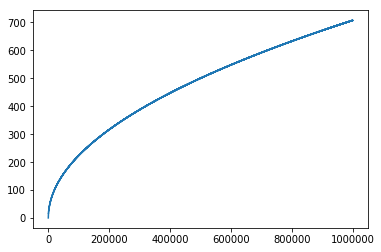

In [198]:
#tikz_print(pr=True)
inorms = tikz_print(n=1000000,sp=100,pr=False)
plt.plot(inorms)